In [1]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ int32       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0    ┃ p25     ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Id                │   0 │      0 │    75.5 │    43.45 │     1 │   38.25 │  75.5 │  112.8 │   150 │ ▇▇▇▇▇▇  │  │
│ │ SepalLengthCm     │   0 │      0 │   5.843 │   0.8281 │   4.3 │     5.1 │   5.8 │    6.4 │   7.9 │ ▃▇▇▇▅▂  │  │
│ │ SepalWidthCm      │   0 │      0 │   3.054 │   0.4336 │     2 │     2.8 │     3 │    3.3 │   4.4 │ ▁▆▇▇▂▁  │  │
│ │ PetalLengthCm     │   0 │      0 │   3.759 │    1.764 │     1 │     1.6 │  4.35 │    5.1 │   6.9 │ ▇ ▂▇▆▂  │  │
│ │ PetalWidthCm      │   0 │      0 │   1.199 │   0.7632 │   0.1 │     0.3 │   1.3 │    1.8 │   2.5 │ ▇ ▂▆▅▃  │  │
│ └───────────────────┴─────┴────────┴─────────┴──────────┴───────┴─────────┴───────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Species                   │       0 │          0 │                            1 │                      150 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'SepalLengthCm'}>],
       [<Axes: title={'center': 'SepalWidthCm'}>,
        <Axes: title={'center': 'PetalLengthCm'}>],
       [<Axes: title={'center': 'PetalWidthCm'}>, <Axes: >]], dtype=object)

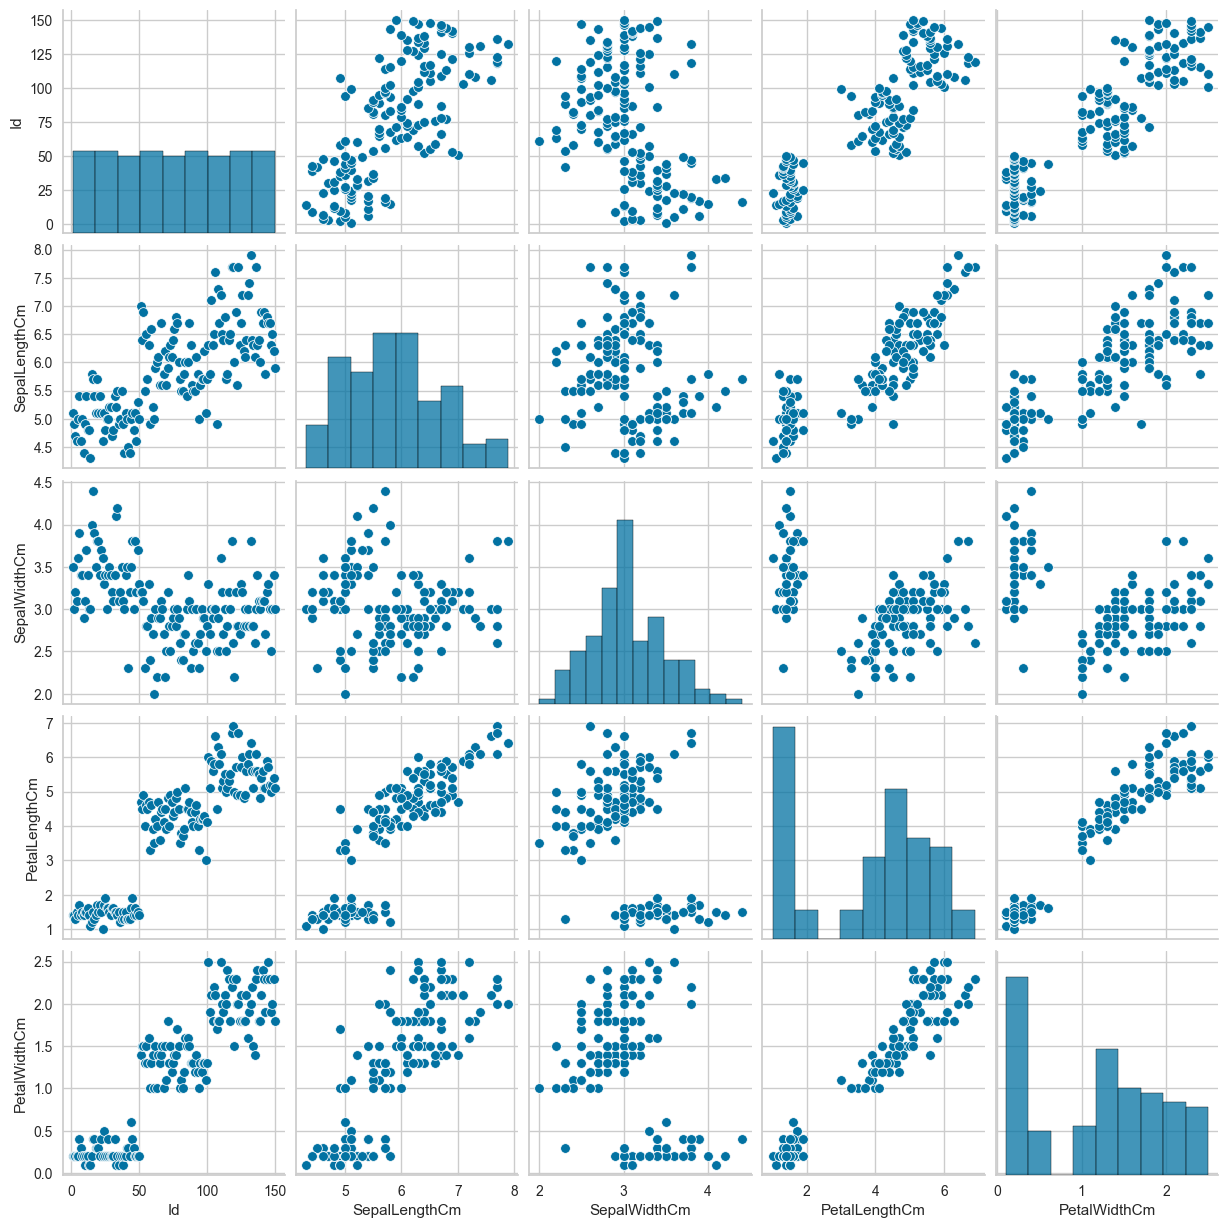

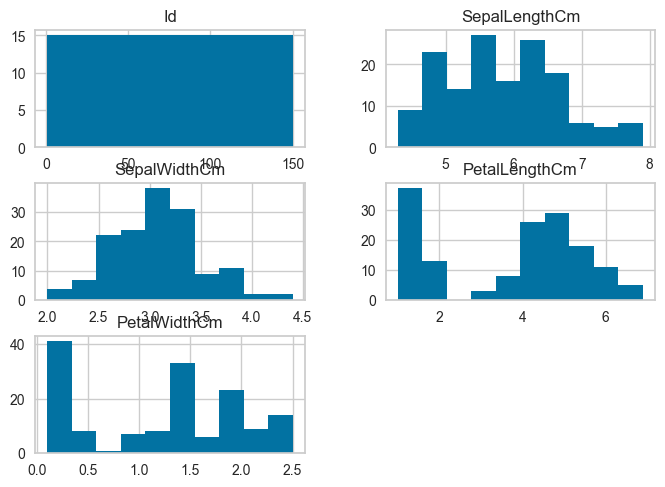

In [2]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None); 

# Load data
df = pd.read_csv('data/Iris.csv')

sk.skim(df)
sns.pairplot(df);
df.hist()

In [3]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


Id               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
SepalLengthCm    [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.4, 4.8, 4.3, ...
SepalWidthCm     [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, ...
PetalLengthCm    [1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1.0, 1.9, ...
PetalWidthCm     [0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, ...
Species             [Iris-setosa, Iris-versicolor, Iris-virginica]
dtype: object

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [5]:
df.drop('Id', axis=1)
# using pycaret for classification
cat_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
experiment = setup(df, target='Species', categorical_features=cat_features, use_gpu=True, verbose=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,855
1,Target,Species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 6)"
5,Transformed data shape,"(150, 47)"
6,Transformed train set shape,"(105, 47)"
7,Transformed test set shape,"(45, 47)"
8,Numeric features,1
9,Categorical features,4


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [6]:
#comparing models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9909,1.0000,0.9909,0.9927,0.9908,0.9862,0.9873,0.9510
lr,Logistic Regression,0.9800,0.0000,0.9800,0.9880,0.9775,0.9697,0.9743,0.2010
knn,K Neighbors Classifier,0.9800,0.9979,0.9800,0.9825,0.9800,0.9701,0.9712,0.2330
dt,Decision Tree Classifier,0.9709,0.9786,0.9709,0.9807,0.9683,0.9559,0.9617,0.1070
gbc,Gradient Boosting Classifier,0.9709,0.0000,0.9709,0.9807,0.9683,0.9559,0.9617,0.2350
et,Extra Trees Classifier,0.9709,0.9971,0.9709,0.9777,0.9702,0.9559,0.9597,0.2340
lightgbm,Light Gradient Boosting Machine,0.9709,0.9958,0.9709,0.9807,0.9683,0.9559,0.9617,0.8620
ada,Ada Boost Classifier,0.9618,0.0000,0.9618,0.9721,0.9593,0.9425,0.9481,0.1470
lda,Linear Discriminant Analysis,0.9327,0.0000,0.9327,0.9382,0.9323,0.8981,0.9014,0.0810
ridge,Ridge Classifier,0.9236,0.0000,0.9236,0.9333,0.9221,0.8844,0.8905,0.1180


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [7]:
#selecting and tuning decision tree model
dt_model = create_model('dt')
tuned_dt = tune_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9286,0.9091,0.9273,0.9076,0.8625,0.8735
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
# checking accuracy of tuned model = 100%
predict_model(tuned_dt, df.sample(20))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,prediction_label,prediction_score
134,135,6.10,2.60,5.60,1.40,Iris-virginica,Iris-virginica,1.00
122,123,7.70,2.80,6.70,2.00,Iris-virginica,Iris-virginica,1.00
42,43,4.40,3.20,1.30,0.20,Iris-setosa,Iris-setosa,1.00
15,16,5.70,4.40,1.50,0.40,Iris-setosa,Iris-setosa,1.00
67,68,5.80,2.70,4.10,1.00,Iris-versicolor,Iris-versicolor,1.00
94,95,5.60,2.70,4.20,1.30,Iris-versicolor,Iris-versicolor,1.00
118,119,7.70,2.60,6.90,2.30,Iris-virginica,Iris-virginica,1.00
100,101,6.30,3.30,6.00,2.50,Iris-virginica,Iris-virginica,1.00
103,104,6.30,2.90,5.60,1.80,Iris-virginica,Iris-virginica,1.00
33,34,5.50,4.20,1.40,0.20,Iris-setosa,Iris-setosa,1.00


In [9]:
# evaluating model with plot decision tree decision boundary  
evaluate_model(tuned_dt)
print(type(tuned_dt))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [10]:
# Finalize the model
final_dt = finalize_model(tuned_dt)

# Saving my dt final model
save_model(final_dt, 'decision_tree_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Id'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))...
                                                               min_samples_leaf=20,
                                                               return_df=True,
      

In [12]:
feature_cols = cat_features
X = df[feature_cols] # Features
y = df['Species'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42) # 60% training, 40% test

# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Note the correction here

# encoding the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train Decision Tree Classifer
tuned_dt = tuned_dt.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred = tuned_dt.predict(X_test_scaled) # Note the correction here

# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [64]:
uniq_species = df['Species'].unique()
uniq_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

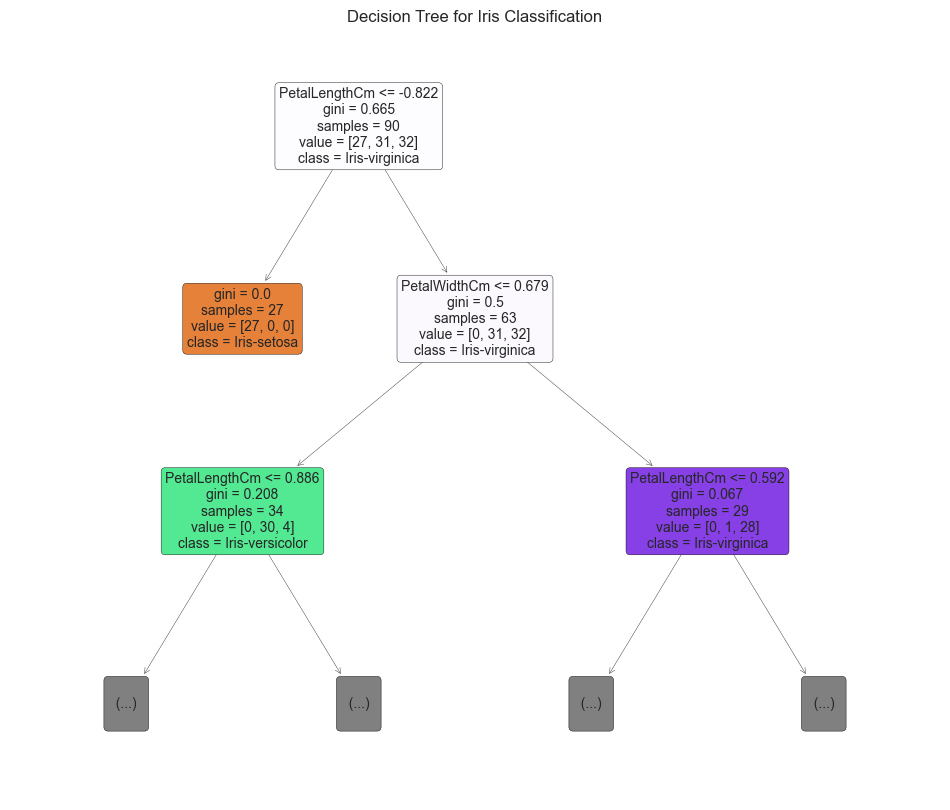

In [14]:
# decision tree plot
plt.figure(figsize=(12,10)) 
plot_tree(tuned_dt, 
          filled=True, 
          feature_names=feature_cols, 
          class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 
          rounded=True, 
          max_depth=2, # increase depth to see nuances in data
          fontsize=10)  
plt.title('Decision Tree for Iris Classification') 
plt.show()

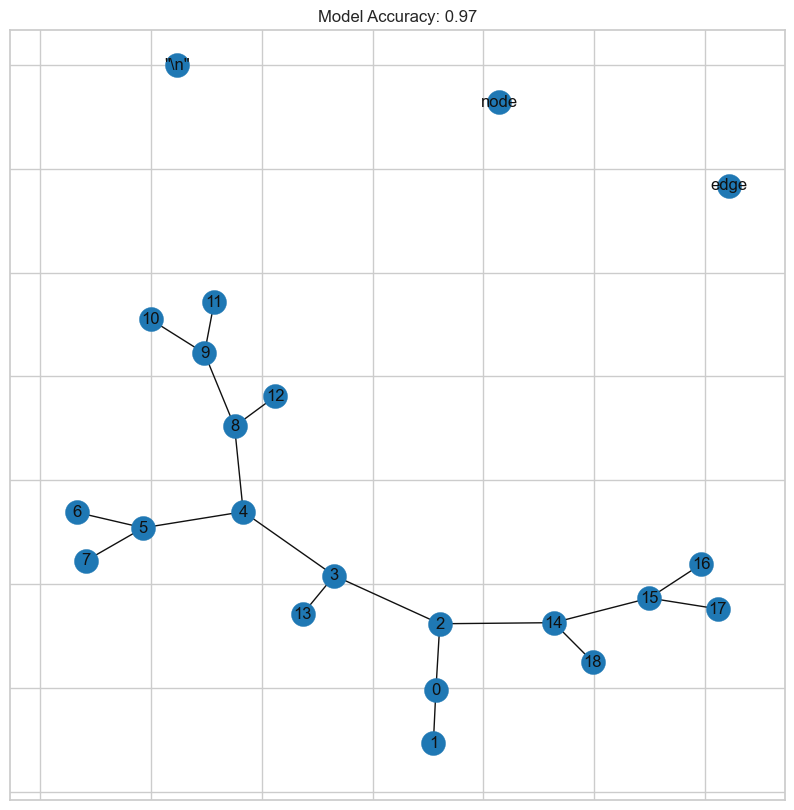

In [18]:
# Visualize the decision network
import networkx as nx
import matplotlib.pyplot as plt
import pydotplus
from sklearn import tree
from sklearn.tree import export_graphviz

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
dot_data = export_graphviz(tuned_dt, out_file=None, feature_names=feature_cols, class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    G.add_node(node.get_name())
for edge in graph.get_edges():
    G.add_edge(edge.get_source(), edge.get_destination())

# Convert the directed graph to an undirected graph
G = G.to_undirected()

# Position the nodes in the graph
pos = nx.spring_layout(G)

# Create a figure
plt.figure(figsize=(10, 10))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add accuracy score to the plot
plt.title(f"Model Accuracy: {accuracy:.2f}")

# Show the plot
plt.show()

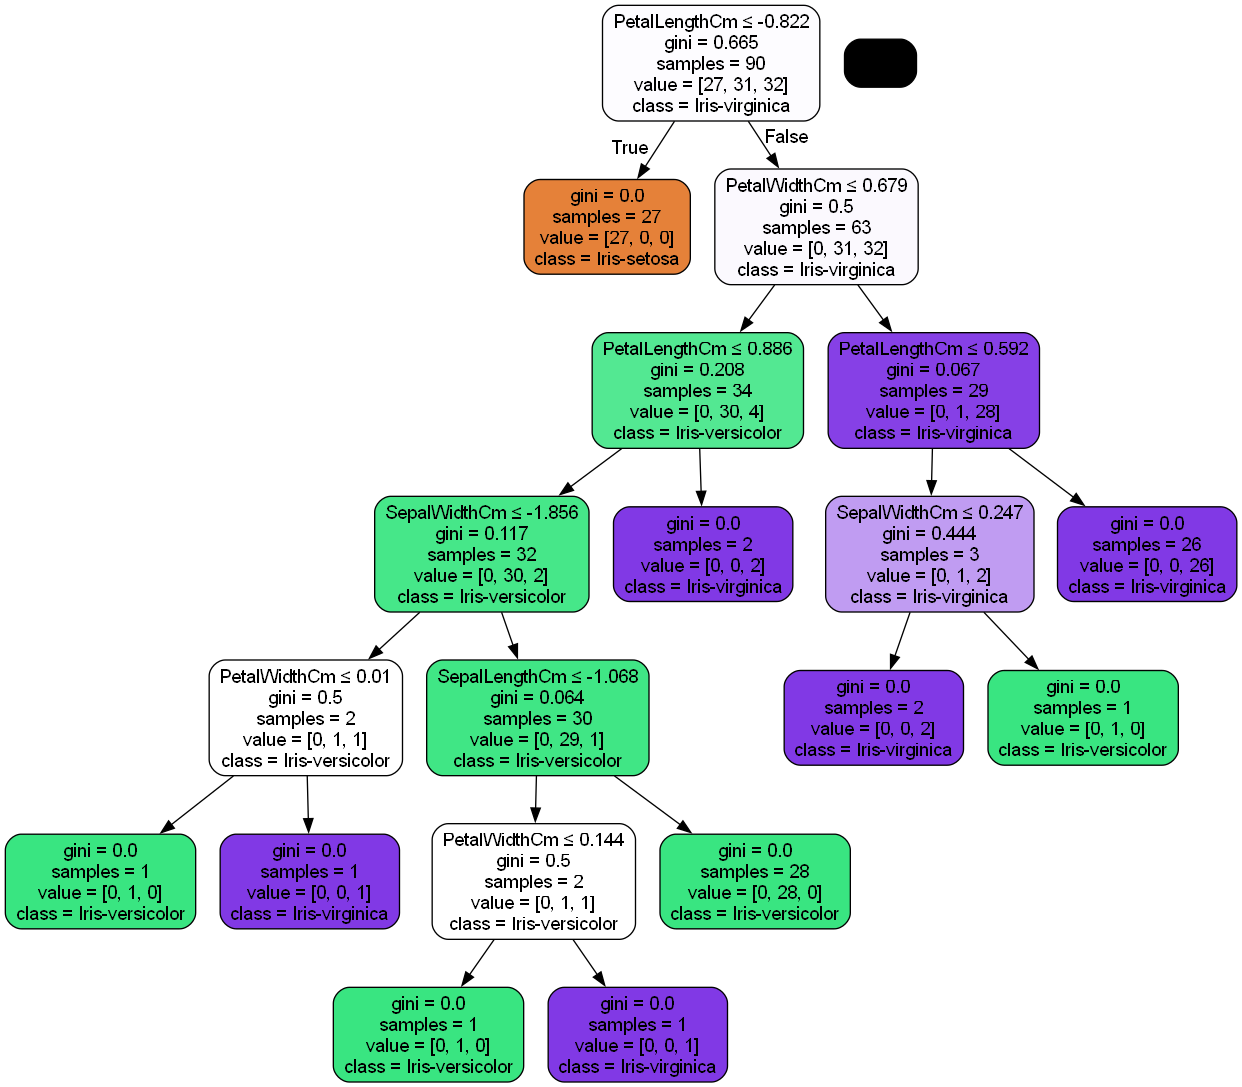

In [19]:
# ploting graphviz decision tree
from six import StringIO 
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(tuned_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())